Analyzing Risk Factors for Diabetes
By Isaiah Dominguez

First  we load the dataset,libraries, and tools we are going to use.

In [14]:
!pip install pandas matplotlib seaborn numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df  =  pd.read_csv("C:/Users/Bigza/Downloads/archive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Next, We make a list of Variables that can not have 0's. Replace them with NA's and count how many invalid numbers we have in each Variable and then we drop all of those valuse and double check our new cleaned data set.

In [16]:
col_inval_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col_inval_zero] = df[col_inval_zero].replace(0 , np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
df_clean = df.dropna()
df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We then get a statistical overview of all numerical values.

In [19]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We then make Histograms to show the distibution of BMI , Age , and Glucose Levels.
BMI and Glucose Levels show a reliviely Normal distributuon pattern with with some out liers that slightly skew the data.
While the Age Histogram is showing highly skewed to the left meaning most of the participants are younger in age.

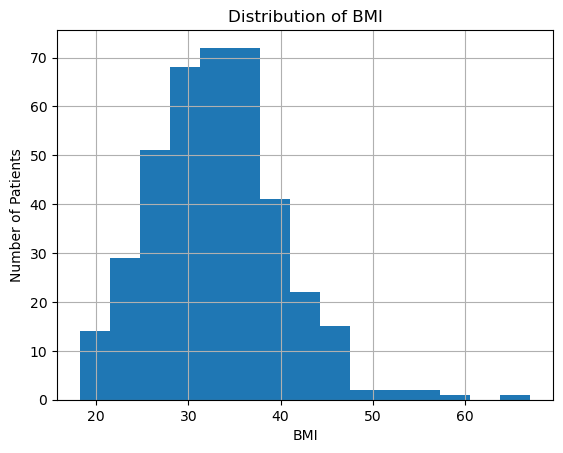

In [57]:
df_clean['BMI'].hist(bins = 15)
plt.xlabel("BMI")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of BMI")  # plot title
plt.show()

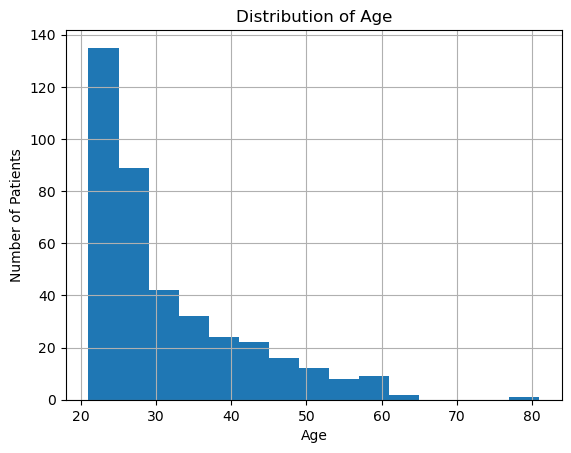

In [59]:
df_clean['Age'].hist(bins = 15)
plt.xlabel("Age")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of Age")  # plot title
plt.show()

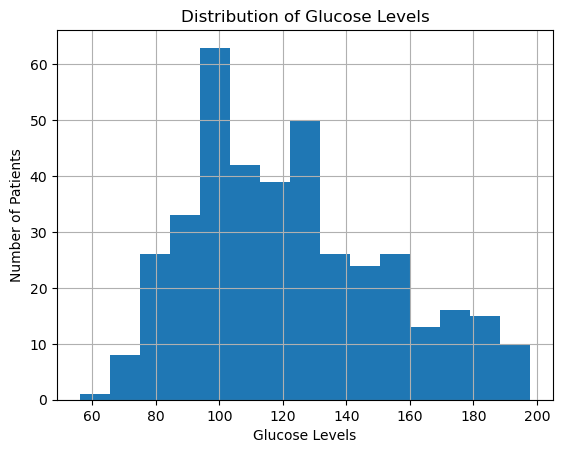

In [60]:
df_clean['Glucose'].hist( bins = 15)
plt.xlabel("Glucose Levels")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of Glucose Levels")  # plot title
plt.show()

Then we create 2 subsets of groups of diabetics and non diabetics and compare the avg BMI of both groups.
This shows that The AVg BMI of NOn Diabetics is lower.
We then visually show the distribution of the 2 subsets with the diabetic group showing a normal distributuion pattern and the non diabetic skewing to the left slightly showing that a majority of non diabetics have a lower BMI to their Diabetic counter parts.

In [82]:
df_diabetics = df_clean[df_clean['DiabetesPedigreeFunction'] >= 1]
df_non_diabetics = df_clean[df_clean['DiabetesPedigreeFunction'] < 1]
print("The Average BMI of the Dataset is " + str(df_clean['BMI'].mean()))

The Average BMI of the Dataset is 33.08622448979592


In [83]:
print("The Average BMI of Non Diabetics in the Dataset is " + str(df_non_diabetics['BMI'].mean()))

The Average BMI of Non Diabetics in the Dataset is 32.76988950276243


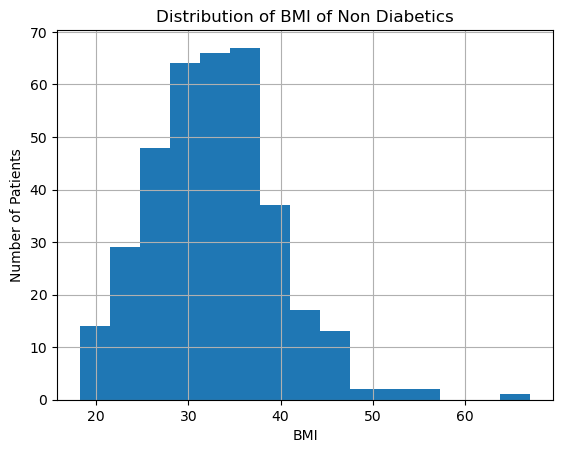

In [67]:
df_non_diabetics['BMI'].hist(bins = 15)
plt.xlabel("BMI")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of BMI of Non Diabetics")  # plot title
plt.show()

In [63]:
df_diabetics['BMI'].mean()

36.90333333333333

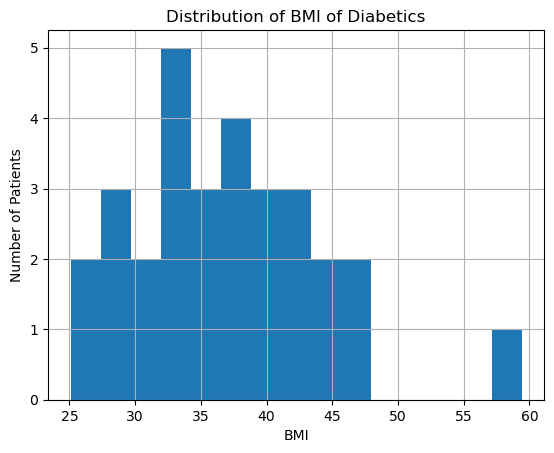

In [74]:
df_diabetics['BMI'].hist(bins = 15)
plt.xlabel("BMI")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of BMI of Diabetics")  # plot title
plt.show()

The Next Visuals Show the Distribution of Age in People with Diabetes, Distribution of Insulin Levels in Diabetics, and a Boxplot comparing the BMI of Diabetic vs Non Diabetic.

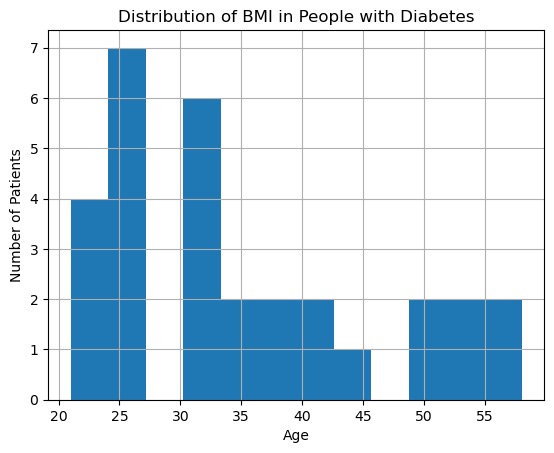

In [101]:
df_diabetics['Age'].hist(bins = 12)
plt.xlabel("Age")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of Age in People with Diabetes")  # plot title
plt.show()

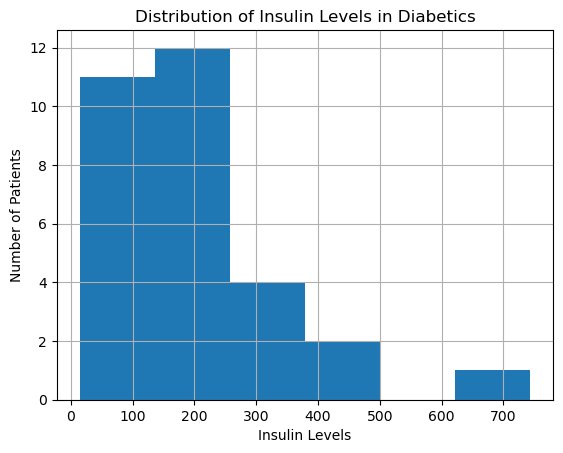

In [98]:
df_diabetics['Insulin'].hist(bins = 6)
plt.xlabel("Insulin Levels")               # x-axis label
plt.ylabel("Number of Patients")  # y-axis label
plt.title("Distribution of Insulin Levels in Diabetics")  # plot title
plt.show()

In [90]:
df["Diabetic"]= np.where(df['DiabetesPedigreeFunction'] >= 1,1,0)

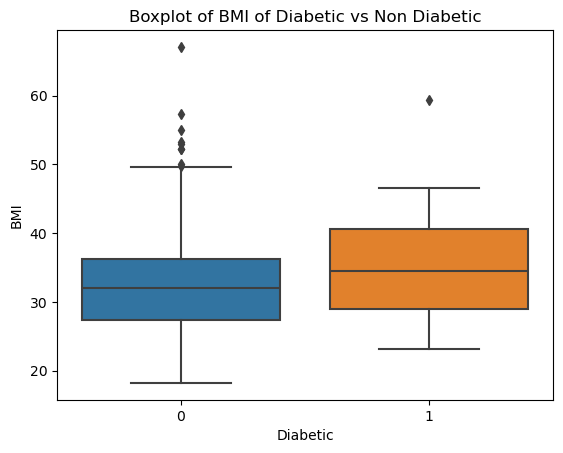

In [103]:
sns.boxplot(x="Diabetic", y="BMI", data=df)
plt.title("Boxplot of BMI of Diabetic vs Non Diabetic")
plt.show()

In [ ]:
Lastly, Whe ran a correlation function of all Numerical Values in the data set showing the more red the square the greater the correlation.

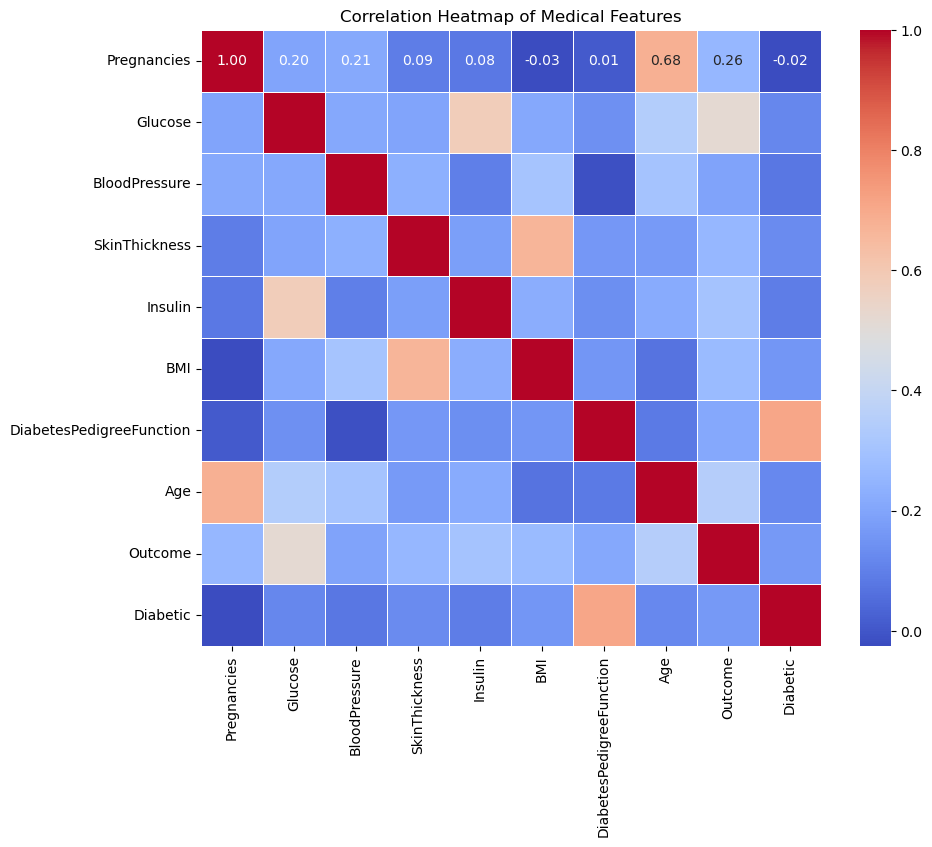

In [106]:
corr = df_clean.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Medical Features")
plt.show()

This project analyzed clinical health data to explore risk factors associated with the likelihood of developing diabetes. Using data cleaning techniques, we addressed invalid entries in critical health metrics such as glucose, blood pressure, and BMI by replacing biologically impossible zero values with missing indicators and removing incomplete records.
Through exploratory data analysis and visualization:
BMI, Glucose, and Age were found to have the strongest positive correlation with diabetes outcome.
 Patients with a Diabetes Pedigree Function ≥ 1 showed higher average BMI values, suggesting a potential compounding effect of genetic risk and lifestyle.
The heatmap revealed that Glucose levels had the highest correlation with diabetes presence, aligning with known medical indicatrs.
